In [ ]:
# import all of the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import yfinance as yf

In [ ]:
# load the data
am = pd.read_csv('/content/Amazon stock data 2000-2025.csv')
am.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


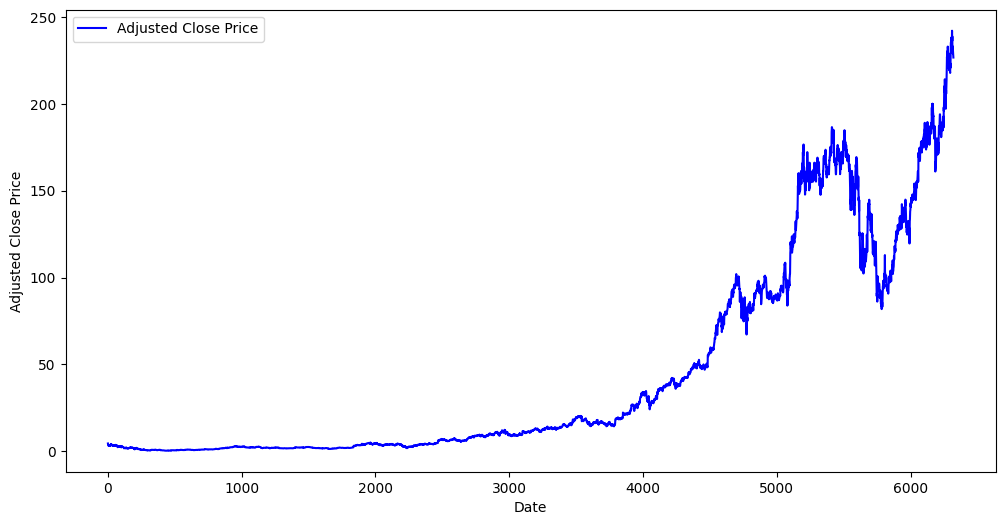

In [ ]:
# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(am.index, am['adj_close'], label='Adjusted Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [ ]:
# Preprocess data and create input sequences
def preprocess_data(data, sequence_length):
    return [(data.iloc[i:i+sequence_length]['adj_close'].values, data.iloc[i+sequence_length]['adj_close'])
            for i in range(len(data) - sequence_length)]

In [ ]:
# Preprocess data
sequence_length = 10
data_sequences = preprocess_data(am, sequence_length)

In [ ]:
# Split data into training and testing sets
def split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    return train_data, test_data

In [ ]:
# Split data into training and testing sets
train_data, test_data = split_data(data_sequences)

In [ ]:
# Train linear regression model
def train_model(X_train, y_train):
    return LinearRegression().fit(X_train, y_train)

In [ ]:
# Prepare training data
X_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])

# Train linear regression model
model = train_model(X_train, y_train)

In [ ]:
# Prepare testing data
X_test = np.array([item[0] for item in test_data])
y_test = np.array([item[1] for item in test_data])

# Example of using the trained model for prediction
last_sequence = X_test[-1].reshape(1, -1)
predicted_price = model.predict(last_sequence)[0]
print(f'\nPredicted Stock Price: {predicted_price}')


Predicted Stock Price: 226.92500053681428


In [ ]:
def evaluate_model(model, X_test, y_test):
    return mean_squared_error(y_test, model.predict(X_test))

In [ ]:
# Evaluate model using Mean Squared Error
mse = evaluate_model(model, X_test, y_test)

# Evaluate model using R-squared
r2 = r2_score(y_test, model.predict(X_test))

# Calculate Adjusted R-squared (adjusts for number of features)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the R-squared and adjusted R-squared
print(f'\nR-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')
print(f'Mean Squared Error on Test Data: {mse: 0.2f}')


R-squared: 0.9911
Adjusted R-squared: 0.99
Mean Squared Error on Test Data:  10.07
